## Project: Investigate a Dataset - [Soccer database]

_**Analysis done by Babatunde Akeredolu**_

## Table of Contents

* Table of Contents
* Introduction
* Data Wrangling
* Exploratory Data Analysis
* Conclusions

## Introduction

#### Dataset description

The dataset is an european soccer dataset, it contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. It contains seven (7) tables namely: country, league, match, player, player_attributes, team and team_attributes. Information about the european countries, league names, match results, player and team are found in these tables. The database is stored in a SQLite database.

#### Questions for analysis

In this project, I will be analyzing:

1. the top teams in terms of matches won.

2. the most scoring teams

3. the players that are rated the most.

#### Importing the required libraries

In [1]:
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays and performing mathematical functions
import matplotlib as mpl #for data visualization and graphical plotting
import matplotlib.pyplot as plt #for creating static, animated, and interactive visualizations
import seaborn as sns #for making statistical graphics


#importing sqlite3 which is needed to create connection with sql database

import sqlite3 #to integrate the SQLite database with Python

## Data Wrangling

#### loading the dataset

In [3]:
#reading the dataset from its location

con = sqlite3.connect("C:/Users/asus/Desktop/DATA ANALYTICS/Udacity/Project 1/database.sqlite")

In [4]:
cur = con.cursor()

#### Understanding the dataset

It is very important that one understands the dataset they will be working on, the columns present in each table need to be understood and how each table relate with other tables, the number of rows and columns present in each table and the data types of each column.

In [5]:
#since I will be working with an sql database, I ran these queries to check the tables present in the database

pd.read_sql("""SELECT * FROM sqlite_sequence;""", con)

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


As we can see from above, there are seven tables present in the database namely: Team, Country, League, Match, Player, Player_Attributes and Team_Attributes.

To further understand the tables better, the columns in each table should be known.

In [6]:
#I ran the following code to print out the the columns in each table

def sql_read(x,y):
    print(x)
    print(y.head())
    print(y.shape)
    print('\n')
    
country = pd.read_sql('select * from country', con) #this code selects all the columns from the country table
sql_read('country',country)
league = pd.read_sql('select * from league', con)
sql_read("league",league)
match = pd.read_sql('select * from match', con)
sql_read("match",match)
player = pd.read_sql('select * from player', con)
sql_read("player",player)
player_attributes = pd.read_sql('select * from player_attributes', con)
sql_read("player_attributes",player_attributes)
team = pd.read_sql('select * from team', con)
sql_read("team",team)
team_attributes = pd.read_sql('select * from team_attributes', con)
sql_read("team_attributes",team_attributes)

country
      id     name
0      1  Belgium
1   1729  England
2   4769   France
3   7809  Germany
4  10257    Italy
(11, 2)


league
      id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A
(11, 3)


match
   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1 

In [7]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [8]:
#to get all the columns in each table, I ran the following code 

#I first define a function then pass our table name into the function
def columns_to_list(x,y):
    print(x + ' has the following columns: ', y.columns.to_list())
    print('\n')

columns_to_list("country",country)
columns_to_list("league",league)
columns_to_list("match",match)
columns_to_list("player",player)
columns_to_list("player_attributes",player_attributes)
columns_to_list("team",team)
columns_to_list("team_attributes",team_attributes)

country has the following columns:  ['id', 'name']


league has the following columns:  ['id', 'country_id', 'name']


match has the following columns:  ['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'awa

In this project, I used python to perform my analysis, it's a good idea to convert the tables to dataframe which makes working with python easier.

In [9]:
#converting the tables to dataframe

country = pd.DataFrame(country)
league = pd.DataFrame(league)
match = pd.DataFrame(match)
player = pd.DataFrame(player)
player_attributes = pd.DataFrame(player_attributes)
team = pd.DataFrame(team)
team_attributes = pd.DataFrame(team_attributes)

#### Cleaning the data

The following cleaning and manipulationS were performed on the dataset:

* **match table:** Some columns were dropped in the match table, I had to drop them since they were not needed for the analysis.


* **match_winner column:** In the match table, there were no column for the match winner, the columns present were the ones for the goals scored by the home team and away team. In a soccer match, the team that scores more goals is the winner of the match, if both teams score the same number of goals, the match is regarded as a draw match. I had to create a new column for the match winner as it is needed for the analysis.

    
* **country name & league name:** The match table only showed the country id which was not really helpful, I joined the country table with the match table using the country_id column, I also joined the match table with the league table using the league_id column. These joins were really needed as the league and country the matches were played were known.

    
* **home team and away team:** The match table was also joined with the team table which was necessary to know the team names of the teams that played each other.a

In [10]:
#selecting the columns needed

match_results = match.iloc[:, np.r_[0:11]]

match_results.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [12]:
#joining the team table with the match table so I can know the names of the teams that played each other

#first, I had to create the home team and away team table then join them together with the match table

home_team = pd.read_sql('select team_api_id, team_long_name as home_team_name, team_short_name as home_team_abbr from match m join team t on m.home_team_api_id = t.team_api_id', con)

print(home_team.head())

print('\n')

away_team = pd.read_sql('select team_api_id, team_long_name as away_team_name, team_short_name as away_team_abbr from match m join team t on m.away_team_api_id = t.team_api_id', con)

print(away_team.head())

   team_api_id     home_team_name home_team_abbr
0         9987           KRC Genk            GEN
1        10000   SV Zulte-Waregem            ZUL
2         9984  KSV Cercle Brugge            CEB
3         9991           KAA Gent            GEN
4         7947      FCV Dender EH            DEN


   team_api_id     away_team_name away_team_abbr
0         9993       Beerschot AC            BAC
1         9994   Sporting Lokeren            LOK
2         8635     RSC Anderlecht            AND
3         9998          RAEC Mons            MON
4         9985  Standard de Liège            STL


In [13]:
#joining the home team name and away team name

fixtures = pd.DataFrame(home_team.join(away_team, lsuffix="_left", rsuffix="_right"))

fixtures.head()

,team_api_id_left,home_team_name,home_team_abbr,team_api_id_right,away_team_name,away_team_abbr
0,9987,KRC Genk,GEN,9993,Beerschot AC,BAC
1,10000,SV Zulte-Waregem,ZUL,9994,Sporting Lokeren,LOK
2,9984,KSV Cercle Brugge,CEB,8635,RSC Anderlecht,AND
3,9991,KAA Gent,GEN,9998,RAEC Mons,MON
4,7947,FCV Dender EH,DEN,9985,Standard de Liège,STL


In [14]:
#joining the team names with the match table so I can know the teams that played each other

match_results = match_results.join(fixtures, lsuffix="_left", rsuffix="_right")

match_results.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id_left,home_team_name,home_team_abbr,team_api_id_right,away_team_name,away_team_abbr
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,9987,KRC Genk,GEN,9993,Beerschot AC,BAC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,10000,SV Zulte-Waregem,ZUL,9994,Sporting Lokeren,LOK
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,9984,KSV Cercle Brugge,CEB,8635,RSC Anderlecht,AND
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,9991,KAA Gent,GEN,9998,RAEC Mons,MON
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,7947,FCV Dender EH,DEN,9985,Standard de Liège,STL


In [15]:
#selecting the columns we need

match_details = match_results.iloc[:, np.r_[0:8, 12, 13, 9, 10, 16, 15, 8]]

In [16]:
#checking for null values in our table

match_details.isnull().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
home_team_name      0
home_team_abbr      0
home_team_goal      0
away_team_goal      0
away_team_abbr      0
away_team_name      0
away_team_api_id    0
dtype: int64

In [17]:
#joining the country table with the match_details table to know the country for each match
#the country is known as country_id in the match table hence the need to rename the id in the country table
country = country.rename(columns = {'id' : 'country_id', 'name' : 'country'}) 
match_details = match_details.join(country.set_index('country_id'), on = 'country_id')


#joining the league table with the match_details table to know the league for each match
#the league is known as league_id in the match table hence the need to rename the id in the league table
league = league.rename(columns = {'id' : 'league_id', 'name' : 'league'})
league = league.drop(['country_id'], axis=1) #to avoid overlapping of columns as the same column is already present in the match table

match_details = match_details.join(league.set_index('league_id'), on = 'league_id')
match_details.tail()


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,home_team_name,home_team_abbr,home_team_goal,away_team_goal,away_team_abbr,away_team_name,away_team_api_id,country,league
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,FC St. Gallen,GAL,1,0,THU,FC Thun,10191,Switzerland,Switzerland Super League
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,FC Vaduz,VAD,1,2,LUZ,FC Luzern,10199,Switzerland,Switzerland Super League
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,Grasshopper Club Zürich,GRA,2,0,SIO,FC Sion,10179,Switzerland,Switzerland Super League
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,Lugano,LUG,0,0,ZUR,FC Zürich,10243,Switzerland,Switzerland Super League
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,BSC Young Boys,YB,4,3,BAS,FC Basel,9931,Switzerland,Switzerland Super League


In [18]:
#rearranging the match_details columns and dropping some columns that are not needed

match_details = match_details.iloc[:, np.r_[0, 16, 15, 3:15]]
match_details.head()

,id,league,country,season,stage,date,match_api_id,home_team_api_id,home_team_name,home_team_abbr,home_team_goal,away_team_goal,away_team_abbr,away_team_name,away_team_api_id
0,1,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-17 00:00:00,492473,9987,KRC Genk,GEN,1,1,BAC,Beerschot AC,9993
1,2,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-16 00:00:00,492474,10000,SV Zulte-Waregem,ZUL,0,0,LOK,Sporting Lokeren,9994
2,3,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-16 00:00:00,492475,9984,KSV Cercle Brugge,CEB,0,3,AND,RSC Anderlecht,8635
3,4,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-17 00:00:00,492476,9991,KAA Gent,GEN,5,0,MON,RAEC Mons,9998
4,5,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-16 00:00:00,492477,7947,FCV Dender EH,DEN,1,3,STL,Standard de Liège,9985


In [19]:
#creating the match winner column

conditions = [(match_details['home_team_goal'] > match_details['away_team_goal']), 
              (match_details['home_team_goal'] < match_details['away_team_goal']),
             (match_details['home_team_goal'] == match_details['away_team_goal'])
             ]
values = [match_details['home_team_name'], match_details['away_team_name'], 'Draw']

match_details['match_winner'] = np.select(conditions, values)

match_details.head()

,id,league,country,season,stage,date,match_api_id,home_team_api_id,home_team_name,home_team_abbr,home_team_goal,away_team_goal,away_team_abbr,away_team_name,away_team_api_id,match_winner
0,1,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-17 00:00:00,492473,9987,KRC Genk,GEN,1,1,BAC,Beerschot AC,9993,Draw
1,2,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-16 00:00:00,492474,10000,SV Zulte-Waregem,ZUL,0,0,LOK,Sporting Lokeren,9994,Draw
2,3,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-16 00:00:00,492475,9984,KSV Cercle Brugge,CEB,0,3,AND,RSC Anderlecht,8635,RSC Anderlecht
3,4,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-17 00:00:00,492476,9991,KAA Gent,GEN,5,0,MON,RAEC Mons,9998,KAA Gent
4,5,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-16 00:00:00,492477,7947,FCV Dender EH,DEN,1,3,STL,Standard de Liège,9985,Standard de Liège


## Exploratory data analysis

**Question 1: teams with the most percentage of matches won**

To calculate the percentage of matches won, the number of games played needs to be calculated.

In [20]:
home_team_games = match_details.iloc[:, np.r_[7,8]] #selecting the columns for home teams in the match table
away_team_games = match_details.iloc[:, np.r_[14,13]] #selecting the columns for away teams in the match table

#the number of games played can be known by knowing the number of times the team name occured
home_team_games = home_team_games.groupby('home_team_name').size().reset_index(name="no of games")
away_team_games = away_team_games.groupby('away_team_name').size().reset_index(name="no of games")

home_team_games.head()

,home_team_name,no of games
0,1. FC Kaiserslautern,34
1,1. FC Köln,102
2,1. FC Nürnberg,85
3,1. FSV Mainz 05,119
4,AC Ajaccio,57


In [21]:
#by joining the home_team_games and awy_team_games together, I can create a new column for the total no of games
team_games = home_team_games.join(away_team_games, lsuffix="_left", rsuffix="_right")
team_games = team_games.rename(columns = {"home_team_name" : "team_name"})

#to know the total games played, we simply add the number of games played at home with the number of away games
team_games['no_of_games'] = team_games['no of games_left'] + team_games['no of games_right']

team_games = team_games.drop(['no of games_left', 'no of games_right', 'away_team_name'], axis=1)
team_games.head()

,team_name,no_of_games
0,1. FC Kaiserslautern,68
1,1. FC Köln,204
2,1. FC Nürnberg,170
3,1. FSV Mainz 05,238
4,AC Ajaccio,114


Now that we have known the number of games played by each team, we need to calculate the number of matches won by each team

In [22]:
#grouping the data based on each team and their corresponding no of wins

team_wins = match_details[match_details['match_winner'] != 'Draw']

team_wins = team_wins.groupby(['match_winner']).size().reset_index(name="no of wins").sort_values("no of wins", axis = 0, ascending = False)

team_wins.head()

,match_winner,no of wins
75,FC Barcelona,234
211,Real Madrid CF,228
49,Celtic,218
77,FC Bayern Munich,193
162,Manchester United,192


The number of games played has been successfully calculated and the number of matches won by each team. To calculate the percentage of matches won, we need to join these two tables together and calculate the percentage of games won by dividing the no of games by the no of matches won and multiply the result by 100.

In [23]:
#joining the team_games table with the team_wins table
team_wins = team_wins.rename(columns = {'match_winner' : 'team_name'}) 

team_percentage_win =  team_wins.join(team_games.set_index('team_name'), on = 'team_name')

#creating a new column for the percentages of matches won
team_percentage_win['percentage_win'] = (team_percentage_win['no of wins'] / team_percentage_win['no_of_games']) * 100

team_percentage_win.head(10)

,team_name,no of wins,no_of_games,percentage_win
75,FC Barcelona,234,304,76.973684
211,Real Madrid CF,228,304,75.000000
49,Celtic,218,304,71.710526
77,FC Bayern Munich,193,272,70.955882
162,Manchester United,192,304,63.157895
133,Juventus,189,301,62.790698
232,SL Benfica,185,248,74.596774
89,FC Porto,183,248,73.790323
15,Ajax,181,272,66.544118
76,FC Basel,180,286,62.937063


In [24]:
#ranking the teams in order of their percentage_win
team_percentage_win.sort_values("percentage_win", axis = 0, ascending = False).head(10)

,team_name,no of wins,no_of_games,percentage_win
75,FC Barcelona,234,304,76.973684
211,Real Madrid CF,228,304,75.000000
232,SL Benfica,185,248,74.596774
89,FC Porto,183,248,73.790323
49,Celtic,218,304,71.710526
207,Rangers,108,152,71.052632
77,FC Bayern Munich,193,272,70.955882
15,Ajax,181,272,66.544118
184,PSV,178,272,65.441176
205,RSC Anderlecht,136,212,64.150943


* The above table shows the overall results of the top teams with the most percentage of matches won, Fc Barcelona tops the list.

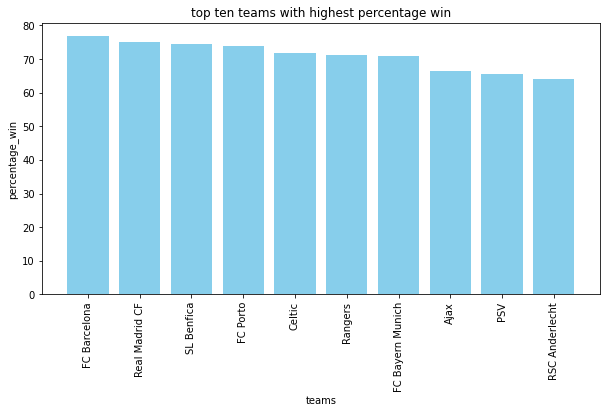

In [25]:
#visualizing the top teams

fig = plt.figure(figsize = (10, 5))
t=team_percentage_win.sort_values("percentage_win", axis = 0, ascending = False).head(10)
 
# creating the bar plot
plt.bar(t['team_name'], t['percentage_win'], color ='skyblue', width = 0.8)
plt.xlabel("teams")
plt.xticks(rotation=90)
plt.ylabel("percentage_win")
plt.title("top ten teams with highest percentage win")
plt.show()

* Fc Barcelona and Real madrid are the top two teams with the highest percentage of games won.

**Question 2: teams with the most goals per game scored**

First, I"ll be visualizing the the distribution of goals scored by the home teams and away teams then move to the average goals per game of each team.

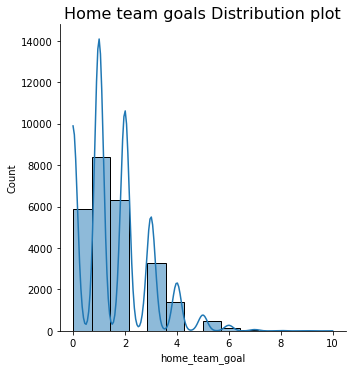

In [27]:
#home team goals distribution plot

sns.displot(match_details['home_team_goal'], bins=14, kde=True)
plt.title('Home team goals Distribution plot', fontsize=16)
plt.show()

* As we can see from the distribution plot, most of the goals scored by the home teams in each match are within the range of 1 to 2.

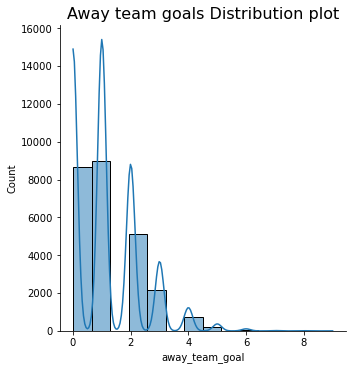

In [28]:
#away team goals distribution plot

sns.displot(match_details['away_team_goal'], bins=14, kde=True)
plt.title('Away team goals Distribution plot', fontsize=16)
plt.show()

* Majority of the goals scored in each match by the away teams are within the range of 0 to 1.

In [29]:
#Moving to the goals per game of each team.

#First, we need to calculate the number of goals scored by each home team and each away team then group by the team's name

home_team_goals = match_details.iloc[:, np.r_[7,8,10]] #selecting the home team details from the match table
home_team_goals = home_team_goals.groupby('home_team_name')['home_team_goal'].sum().reset_index(name="no of goals").sort_values("no of goals", axis = 0, ascending = False)

away_team_goals = match_details.iloc[:, np.r_[14,13,11]] #selecting the away team details from the match table
away_team_goals = away_team_goals.groupby('away_team_name')['away_team_goal'].sum().reset_index(name="no of goals").sort_values("no of goals", axis = 0, ascending = False)

#after creating the home and away team goals, we need to join the two tables together
team_goals = home_team_goals.join(away_team_goals, lsuffix="_left", rsuffix="_right")

team_goals.head()

,home_team_name,no of goals_left,away_team_name,no of goals_right
211,Real Madrid CF,505,Real Madrid CF,338
75,FC Barcelona,495,FC Barcelona,354
49,Celtic,389,Celtic,306
77,FC Bayern Munich,382,FC Bayern Munich,271
184,PSV,370,PSV,282


In [30]:
#dropping some columns not needed
team_goals = team_goals.rename(columns = {"home_team_name" : "team_name"})
team_goals = team_goals.drop(['away_team_name'], axis=1) #dropping this column as it is not needed

#creating a new column for the total number of goals scored by each team
team_goals['no_of_goals'] = team_goals['no of goals_left'] + team_goals['no of goals_right']
team_goals = team_goals.drop(['no of goals_left', 'no of goals_right'], axis=1) #dropping extra columns not needed

team_goals.head(10)

,team_name,no_of_goals
211,Real Madrid CF,843
75,FC Barcelona,849
49,Celtic,695
77,FC Bayern Munich,653
184,PSV,652
161,Manchester City,606
15,Ajax,647
76,FC Basel,619
162,Manchester United,582
51,Chelsea,583


In [31]:
#joining the team_goals and the team_games tables together which is needed for the goals_per_game column
team_goals_games =  team_goals.join(team_games.set_index('team_name'), on = 'team_name')

#creating a new column for the goals_per_game of each team
team_goals_games['goals_per_game'] = team_goals_games['no_of_goals'] / team_goals_games['no_of_games']

team_goals_games.head()

,team_name,no_of_goals,no_of_games,goals_per_game
211,Real Madrid CF,843,304,2.773026
75,FC Barcelona,849,304,2.792763
49,Celtic,695,304,2.286184
77,FC Bayern Munich,653,272,2.400735
184,PSV,652,272,2.397059


In [32]:
#ranking the teams in order of their goals_per_game

team_goals_games.sort_values("goals_per_game", axis = 0, ascending = False).head(10)

,team_name,no_of_goals,no_of_games,goals_per_game
75,FC Barcelona,849,304,2.792763
211,Real Madrid CF,843,304,2.773026
77,FC Bayern Munich,653,272,2.400735
184,PSV,652,272,2.397059
15,Ajax,647,272,2.378676
232,SL Benfica,568,248,2.290323
49,Celtic,695,304,2.286184
89,FC Porto,541,248,2.181452
76,FC Basel,619,286,2.164336
207,Rangers,324,152,2.131579


* The above table shows the overall results of the top teams with the most goals per matches, Fc Barcelona tops the list.

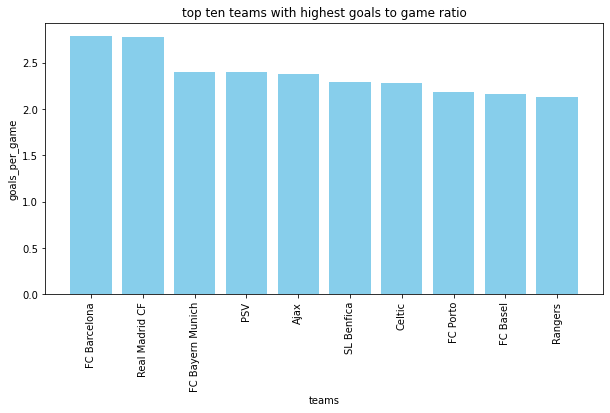

In [33]:
#visualizing the top teams

fig = plt.figure(figsize = (10, 5))
t=team_goals_games.sort_values("goals_per_game", axis = 0, ascending = False).head(10)
 
# creating the bar plot
plt.bar(t['team_name'], t['goals_per_game'], color ='skyblue', width = 0.8)
plt.xlabel("teams")
plt.xticks(rotation=90)
plt.ylabel("goals_per_game")
plt.title("top ten teams with highest goals to game ratio")
plt.show()

* Fc Barcelona and Real madrid are the top two teams with the highest goals to game ratio.

**Question 3: Top_players analysis**

I ran some codes to calculate the average ratings of the players from the total number of ratings of each player. The result was joined with the player table using the player_api_id so that the names of the players can be known as this information was not available in the player_attributes table.

In [35]:
#getting the average ratings of the players from the total number of ratings of each player
player_ratings = player_attributes.groupby('player_api_id')['overall_rating'].mean().reset_index(name="average_ratings")

#joining the result to player table to get the names of the players
top_players = player_ratings.join(player.set_index('player_api_id'), on = 'player_api_id')

top_players.head()

,player_api_id,average_ratings,id,player_name,player_fifa_api_id,birthday,height,weight
0,2625,60.142857,8372,"Patryk Rachwal,18",148544,1981-01-27 00:00:00,175.26,154
1,2752,69.380952,2639,Diego Mainz,135819,1982-12-29 00:00:00,187.96,174
2,2768,69.285714,5319,Jose Dorado,110019,1982-07-10 00:00:00,180.34,154
3,2770,71.133333,4339,Ignacio Gonzalez,182861,1982-05-14 00:00:00,180.34,161
4,2790,70.200000,306,Alberto Rey,110809,1974-02-15 00:00:00,175.26,163


In [36]:
#selecting the columns needed and renaming some of the columns

top_players = top_players.iloc[:, np.r_[3,1]]

top_players = top_players.rename(columns = {'average_ratings' : 'player_rating'})

In [37]:
#ranking the players in order of their ratings

top_players.sort_values("player_rating", axis = 0, ascending = False).head(10)

,player_name,player_rating
2038,Lionel Messi,92.192308
1979,Cristiano Ronaldo,91.280000
2006,Franck Ribery,88.458333
2021,Andres Iniesta,88.320000
2793,Zlatan Ibrahimovic,88.285714
1940,Arjen Robben,87.840000
3769,Xavi Hernandez,87.636364
1936,Wayne Rooney,87.222222
1846,Iker Casillas,86.954545
1980,Philipp Lahm,86.733333


* The top three players based on their ratings are Lionel Messi, Cristiano Ronaldo and Frank Ribery.

Text(0.5, 1.0, 'top players in terms of ratings')

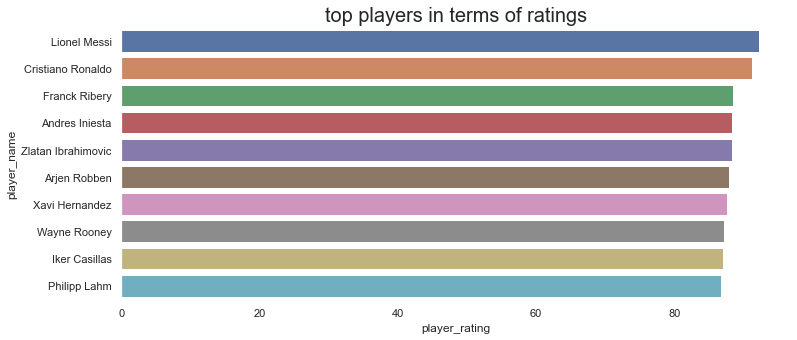

In [38]:
#visualizing the top players

t=top_players.sort_values("player_rating", axis = 0, ascending = False).head(10)
sns.set(rc = {'figure.figsize':(12,5), 'axes.facecolor':'white'})
sns.barplot(x=t['player_rating'], y=t['player_name'])
plt.title('top players in terms of ratings', size=20)

* The above chart shows the top ten players with the highest ratings, Lionel Messi tops the list.

## Conclusion

#### Results

* From the analysis, the top three teams according to their win rate are Fc Barcelona, Real Madrid and Celtic while in terms of goals are Fc Barcelona, Real Madrid and Fc Bayern Munich. This shows that Fc Barcelona and Real Madrid are the two best teams in Europe.


* From the list of players we have, Lionel Messi, Cristiano Ronaldo and Frank Ribery are the top players in Europe.

#### Limitations

* Some teams are missing from the team_attributes table, this didn't permit for adequate analyses on the team.


* As much as I would like to further analyze the players, getting to know the team each player belongs to, the dataset is limited in this aspect as information to get the details of the players couldn't be gotten from the dataset provided.


* Players and Teams' attributes were sourced from EA Sports FIFA video game series, they are not real life data